# **Introducción a Redes Neuronales --- Tarea 2: Perceptron**

*Autor: David Segura Carnet #13-11341*,
17/06/2020

### Parte 1: Demostración
Por  reducción al absurdo suponemos que el perceptrón a entrenar si puede aprender la tarea de clasificar el problema mencionado. Como el perceptrón puede aprender a entrenar la tarea implica que los datos son linealmente separable, donde existen dos clases 0 y 1, que representaremos con $C_0$ y $C_1$ respectivamente y tenemos además que $(1,3)$ y $(3,9)$ $\in C_1$, mientras que $(2,6) \in C_0$. 

Como son linealmente separables, existe una recta en el plano bidimensional, digamos $y = ax + b$ que separa ambos conjuntos de datos donde definimos que: Si $y \geq ax + b$ entonces $(x,y) \in C_1$, y si $y < ax +  b$ entonces $(x,y) \in C_0$. Por consiguiente nos queda:

$$9 \geq 3a + b \hspace{0.5 cm} (1)$$ 
$$3 \geq a + b \hspace{0.5 cm} (2)$$
$$6 < 2a + b \hspace{0.5 cm} (3)$$

Luego para encontrar los valores de a y b haremos manipulación de inecuaciones:

$$2*9 \geq 2*(3a + b)$$ 
$$6*3 \geq 6*(a + b)$$
$$3*6 < 3*(2a + b)$$

$\implies$

$$18 \geq 6a + 2b \hspace{0.5 cm} (4)$$ 
$$18 \geq 6a + 6b \hspace{0.5 cm} (5)$$
$$18 < 6a + 3b \hspace{0.5 cm} (6)$$

Sustituyendo (6) en (4) tenemos:

$$6a + 3b > 18 \geq 6a + 2b$$
$$6a + 3b > 6a + 2b$$ 
$$3b - 2b > 0$$ 
$$b > 0$$ 

Luego sustituyendo (6) en (5) tenemos:

$$6a + 3b > 18 \geq 6a + 6b$$
$$6a + 3b > 6a + 6b$$ 
$$6b - 3b < 0$$ 
$$3b < 0$$ 
$$b < 0$$

Contradicción, no existe dicha recta y por ende el perceptrón no puede aprender la tarea en cuestión.


### Parte 2: Implementación Perceptron

A continuación se realizará la implementacion de un Perceptron Multiclase, utilizando matrices para la representación de los mismos

In [0]:
import numpy as np
import random 

In [0]:
# Clase Perceptron

# Inicializacion: lowRandom -> Valor minimo del rango de los valores a generar en la matriz de pesos
#                 highRandom -> Valor maximo del rango de los valores a generar en la matriz de pesos
#                 numPerceptron -> Dimension de la matriz de peso correspondiente a los perceptrones de la red
#                 dimData_with_bias -> Dimension de la matriz de peso correspondiente a la dimension de datos

class perceptron:
  def __init__(self, lowRandom, highRandom, numPerceptron, dimData_with_bias):
    # Inicializacion de la matriz de los pesos incluyendo el bias: La matriz se inicializara
    # ya traspuesta por la definicion que tiene en las dimensiones.
    self.w = np.random.uniform(low=lowRandom, high=highRandom, size=(numPerceptron,dimData_with_bias))

  # Funcion Propagacion

  # Argumentos: data -> Vector con los datos a procesar
  #             funcion_activacion -> Funcion con la que se activaran los perceptrones

  def propagacion(self, data, funcion_activacion):
    # Se le incluye al vector de los datos el valor de 1 para la representacion
    # del sesgo, y luego se realiza el producto punto entre la matriz de pesos
    # y el vector de datos, donde despues se realiza la activacion y se retorna
    # la salida "y"
    dataMod = np.insert(data, 0, 1, axis=0)
    estimulo = np.dot(self.w, dataMod)
    return [funcion_activacion(i) for i in estimulo]
  
  # Funcion Actualizacion

  # Argumentos: etha -> Tasa de aprendizaje
  #             error -> Error resultante en caso de que el dato haya sido mal clasificado
  #             data -> Vector con los datos a procesar

  def actualizacion(self, etha, error, data):
    # Se le incluye al vector de los datos el valor de 1 para la representacion
    # del sesgo, y luego se realiza la respectiva actualizacion de pesos
    dataMod = np.insert(data, 0, 1, axis=0)
    self.w += etha * np.outer(error,dataMod)

  # Funcion RNA_Training

  # Argumentos: data -> Vector con los datos a procesar
  #             etha -> Tasa de aprendizaje
  #             maxEpochs -> Limite maximo de epocas a entrenar 
  #             funcion_activacion -> Funcion con la que se activaran los perceptrones
  #             d -> Funcion que retorna el vector de valor esperado de un dato

  def training(self, data, etha, maxEpochs, funcion_activacion, d):
    # Se realiza el entrenamiento de la red mediante la actualizacion de los 
    # de los pesos si se clasifica mal un dato, donde estos datos del vector data
    # se reordenan al comienzo de cada epoca y luego se subdividen en x[0] para 
    # el valor esperado y x[1:] para los demas atributos de los datos.
    print("Entrenamiento")
    cambio = True
    epochs = 0
    log_precision = []
    while cambio and epochs <= maxEpochs:
      cambio = False
      np.random.shuffle(data) #  Reordenamiento de los datos aleatorios
      for x in data:
        y = self.propagacion(x[1:],funcion_activacion)
        error = np.subtract(d(x[0]),y)
        if np.array_equal(error, np.zeros(len(error))) == False:
          cambio = True
          self.actualizacion(etha, error, x[1:])
      print("EPOCA: "+ str(epochs))
      log_precision.append(self.predict(data, funcion_activacion, d))
      epochs += 1
    return log_precision
  
  # Funcion Predict

  # Argumentos: data -> Vector con los datos a procesar
  #             funcion_activacion -> Funcion con la que se activaran los perceptrones
  #             d -> Funcion que retorna el vector de valor esperado de un dato

  def predict(self, data, funcion_activacion, d):
    # Se realiza ya la prediccion de los datos usando la funcion propagacion
    # y retornara la precision de la red en clasificar los datos.
    contador = 0
    for x in data:
      y = self.propagacion(x[1:],funcion_activacion)
      if np.array_equal(y, d(x[0])) == False:
        contador += 1
    return 100 * (len(data) - contador) / len(data) 

### Parte 3: Clasificación de Dígitos

Se entrenaran 10 perceptrones que en conjunto puedan clasificar los dígitos en la base de datos MNIST. Cada ejemplo es una imagen de 28x28 pixels y cada pixel es un valor en la escala de grises ( en el intervalo [0,255]). La arquitectura del perceptrón de una capa constará de:


> (a) capa de 785 entradas, que corresponden a los 28x28 elementos de la imagen + la previsión del sesgo.


> (b) 10 perceptrones con función de activación umbral (vale 1 si el argumento es positivo y 0 en caso contrario).

La respuesta deseada de cada ejemplo será un vector canónico que tendrá el valor de 1 en la posición de la neurona que representa el dígito. Así el dígito ’0’ tendrá respuesta deseada de (1,0,0,0,0,0,0,0,0,0), mientras que el dígito 2 tiene respuesta deseada (0,0,1,0,0,0,0,0,0,0).

Entrene el perceptrón inicializando los pesos en el intervalo [-0.05, 0.05] y entrene por 50 épocas usando los valores de η = 0.001, 0.01, y 0.1. Calcule con los datos de prueba el porcentaje de clasificaciones correctas para cada tasa de aprendizaje y discuta los resultados obtenidos con las distintas tasas de aprendizaje.

Ayuda: Previo al entrenamiento se sugiere escalar los datos (divida por 255) y al entrenar reordene los datos para que la presentacio ́n sea aleatoria.

In [6]:
from google.colab import drive

# En caso de no usar Google Colab, eliminar la importacion de la libreria y el mount,
# Y modificar las rutas correspondientes de los archivos a cargar
drive.mount('/content/drive')

path_train = '/content/drive/My Drive/RNA/Tarea 2/mnist_train.csv'
path_test = '/content/drive/My Drive/RNA/Tarea 2/mnist_test.csv'

# Cargamos los datos y de una vez los escalamos dividiendo por 255
data_train = np.loadtxt(open(path_train, "rb"), delimiter=",", skiprows=1)
data_train = np.concatenate((np.transpose([data_train[0:,0]]), data_train[0:,1:]/255), axis=1)
data_test = np.loadtxt(open(path_test, "rb"), delimiter=",", skiprows=1)
data_test = np.concatenate((np.transpose([data_test[0:,0]]), data_test[0:,1:]/255), axis=1)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Definimos las funciones d y de activacion a usar

def d(x):
  value = [0,0,0,0,0,0,0,0,0,0]
  value[int(x)] = 1
  return value

def umbral(x):
  if x >= 0:
    return 1
  else:
    return 0

[0] Perceptron con Tasa de Aprendizaje  -> 0.001
Entrenamiento
EPOCA: 0
EPOCA: 1
EPOCA: 2
EPOCA: 3
EPOCA: 4
EPOCA: 5
EPOCA: 6
EPOCA: 7
EPOCA: 8
EPOCA: 9
EPOCA: 10
EPOCA: 11
EPOCA: 12
EPOCA: 13
EPOCA: 14
EPOCA: 15
EPOCA: 16
EPOCA: 17
EPOCA: 18
EPOCA: 19
EPOCA: 20
EPOCA: 21
EPOCA: 22
EPOCA: 23
EPOCA: 24
EPOCA: 25
EPOCA: 26
EPOCA: 27
EPOCA: 28
EPOCA: 29
EPOCA: 30
EPOCA: 31
EPOCA: 32
EPOCA: 33
EPOCA: 34
EPOCA: 35
EPOCA: 36
EPOCA: 37
EPOCA: 38
EPOCA: 39
EPOCA: 40
EPOCA: 41
EPOCA: 42
EPOCA: 43
EPOCA: 44
EPOCA: 45
EPOCA: 46
EPOCA: 47
EPOCA: 48
EPOCA: 49
EPOCA: 50
RESULTADOS  PREDICT: 77.35773577357736


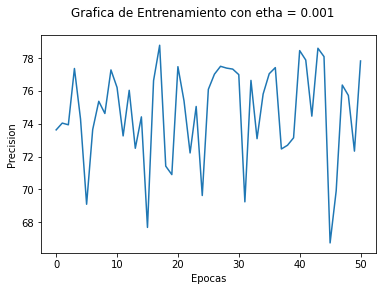

[1] Perceptron con Tasa de Aprendizaje  -> 0.01
Entrenamiento
EPOCA: 0
EPOCA: 1
EPOCA: 2
EPOCA: 3
EPOCA: 4
EPOCA: 5
EPOCA: 6
EPOCA: 7
EPOCA: 8
EPOCA: 9
EPOCA: 10
EPOCA: 11
EPOCA: 12
EPOCA: 13
EPOCA: 14
EPOCA: 15
EPOCA: 16
EPOCA: 17
EPOCA: 18
EPOCA: 19
EPOCA: 20
EPOCA: 21
EPOCA: 22
EPOCA: 23
EPOCA: 24
EPOCA: 25
EPOCA: 26
EPOCA: 27
EPOCA: 28
EPOCA: 29
EPOCA: 30
EPOCA: 31
EPOCA: 32
EPOCA: 33
EPOCA: 34
EPOCA: 35
EPOCA: 36
EPOCA: 37
EPOCA: 38
EPOCA: 39
EPOCA: 40
EPOCA: 41
EPOCA: 42
EPOCA: 43
EPOCA: 44
EPOCA: 45
EPOCA: 46
EPOCA: 47
EPOCA: 48
EPOCA: 49
EPOCA: 50
RESULTADOS  PREDICT: 78.02780278027802


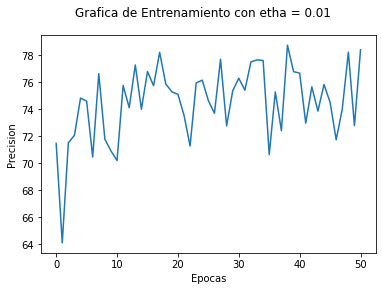

[2] Perceptron con Tasa de Aprendizaje  -> 0.1
Entrenamiento
EPOCA: 0
EPOCA: 1
EPOCA: 2
EPOCA: 3
EPOCA: 4
EPOCA: 5
EPOCA: 6
EPOCA: 7
EPOCA: 8
EPOCA: 9
EPOCA: 10
EPOCA: 11
EPOCA: 12
EPOCA: 13
EPOCA: 14
EPOCA: 15
EPOCA: 16
EPOCA: 17
EPOCA: 18
EPOCA: 19
EPOCA: 20
EPOCA: 21
EPOCA: 22
EPOCA: 23
EPOCA: 24
EPOCA: 25
EPOCA: 26
EPOCA: 27
EPOCA: 28
EPOCA: 29
EPOCA: 30
EPOCA: 31
EPOCA: 32
EPOCA: 33
EPOCA: 34
EPOCA: 35
EPOCA: 36
EPOCA: 37
EPOCA: 38
EPOCA: 39
EPOCA: 40
EPOCA: 41
EPOCA: 42
EPOCA: 43
EPOCA: 44
EPOCA: 45
EPOCA: 46
EPOCA: 47
EPOCA: 48
EPOCA: 49
EPOCA: 50
RESULTADOS  PREDICT: 70.09700970097009


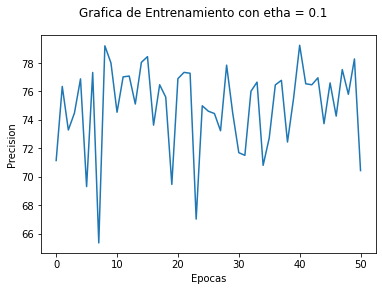

In [9]:
import matplotlib.pyplot as plt

print("[0] Perceptron con Tasa de Aprendizaje  -> 0.001")

perceptron_0_001 = perceptron(-0.05, 0.05, 10, len(data_train[0]))
graph_0_001 = perceptron_0_001.training(data_train, 0.001, 50, umbral, d)
precision_0_001 = perceptron_0_001.predict(data_test, umbral, d)
print("RESULTADOS  PREDICT: " + str(precision_0_001))
#Plot
plt.ylabel("Precision")
plt.xlabel("Epocas")
plt.suptitle('Grafica de Entrenamiento con etha = 0.001')
plt.plot(graph_0_001)
plt.show()

print("[1] Perceptron con Tasa de Aprendizaje  -> 0.01")
perceptron_0_01 = perceptron(-0.05, 0.05, 10, len(data_train[0]))
graph_0_01 = perceptron_0_01.training(data_train, 0.01, 50, umbral, d)
precision_0_01 = perceptron_0_01.predict(data_test, umbral, d)
print("RESULTADOS  PREDICT: " + str(precision_0_01))
#Plot
plt.ylabel("Precision")
plt.xlabel("Epocas")
plt.suptitle('Grafica de Entrenamiento con etha = 0.01')
plt.plot(graph_0_01)
plt.show()


print("[2] Perceptron con Tasa de Aprendizaje  -> 0.1")
perceptron_0_1 = perceptron(-0.05, 0.05, 10, len(data_train[0]))
graph_0_1 = perceptron_0_1.training(data_train, 0.1, 50, umbral, d)
precision_0_1 = perceptron_0_1.predict(data_test, umbral, d)
print("RESULTADOS  PREDICT: " + str(precision_0_1))
#Plot
plt.ylabel("Precision")
plt.xlabel("Epocas")
plt.suptitle('Grafica de Entrenamiento con etha = 0.1')
plt.plot(graph_0_1)
plt.show()